In [ ]:
#作业11
#假设在红移为1处去观测一个现在红移为2的星系，其红移为多少？

In [1]:
def get_z_obs(z_emit, z_observer):
    return (1 + z_emit) / (1 + z_observer) - 1
get_z_obs(2, 1)

0.5

In [4]:
#假设宇宙的膨胀是一个线性过程，请根据今天的
#哈勃常数估算宇宙的年龄。

In [3]:
from astropy import units as u
H0 = 70 * u.km / (u.s * u.Mpc)  # 假设宇宙线性膨胀，那么H(z)就假设为H0
# 计算哈勃时间（宇宙年龄），即哈勃常数的倒数
T_Hubble = (1 / H0).to(u.Gyr)
print(f"估计的宇宙年龄为：{T_Hubble:.4f}")

估计的宇宙年龄为：13.9685 Gyr


In [6]:
#作业12
#一团1000个太阳质量的中性气体云（全部为H原子）, 温度为30K，当云的密度大于多少时，气体云将发生塌缩？塌缩（自由下落）时标为多少？

#分子云坍缩临界条件：𝐺𝑀𝑚𝐻𝑅=3𝐾𝑇2

#密度𝑛
#与半径𝑅
#的关系：𝑛4𝜋𝑅33𝑚𝐻=1000𝑀⊙

In [7]:
import numpy as np
from astropy import units as u
from astropy.constants import k_B, G, M_sun
from astropy.units import Quantity

M_J = 1000 * M_sun
T = 30 * u.K
m_H = 1.674e-27 * u.kg  # 氢原子质量

R = (G*M_J*m_H)/(3/2*k_B*T)
print(f"R: {R.to(u.cm):.3e}")
n = M_J/((4/3)*np.pi*R**3*m_H)
print(f"大于rho_crit: {n.to(1/u.cm**3):.3f}时坍缩")

tau = np.sqrt(2*R**3/(G*M_J))
print(f"坍缩时标tau: {tau.to(u.Gyr):.3f}")

R: 3.576e+19 cm
大于rho_crit: 6.202 1 / cm3时坍缩
坍缩时标tau: 0.026 Gyr


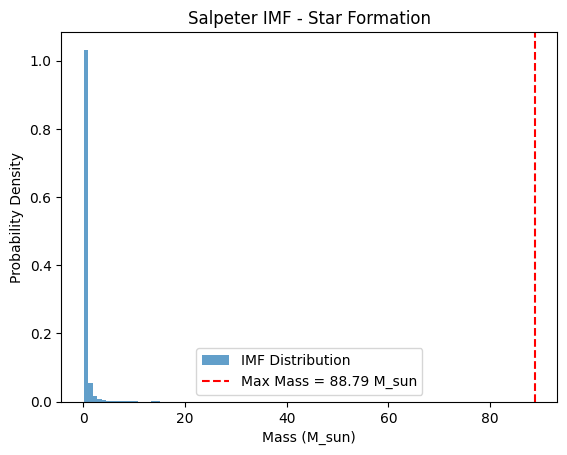

88.78850237041276

In [9]:
#task12.2 这团气体中能形成的最大质量的恒星的质量是多少?
#• 假设分子云中的恒星形成遵循Salpter初始质量函数(最小质量的恒星为0.08太阳质量) • 这道题不是很好解析求解(需要估算一个合理的ΔM)，或者采用MC方法
#• http://cluster.shao.ac.cn/~shen/Lecture/IMF.pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# 定义Salpeter IMF函数
def salpeter_IMF(M, alpha=-2.35):
    """
    Salpeter initial mass function, proportional to M^-2.35.
    """
    return M ** alpha

# 归一化因子
def normalization_factor(M_min, M_max, alpha=-2.35):
    """
    计算Salpeter IMF的归一化因子
    """
    return 1 / integrate.quad(salpeter_IMF, M_min, M_max)[0]

# 蒙特卡罗模拟生成恒星质量
def monte_carlo_sampling(num_samples, M_min, M_max, alpha=-2.35):
    """
    使用蒙特卡罗方法从Salpeter IMF中采样恒星质量
    """
    # 归一化常数
    norm = normalization_factor(M_min, M_max, alpha)
    
    # 随机生成样本
    samples = []
    while len(samples) < num_samples:
        M_random = np.random.uniform(M_min, M_max)
        probability = salpeter_IMF(M_random, alpha) * norm
        if np.random.rand() < probability:
            samples.append(M_random)
    
    return np.array(samples)

# 设置参数
M_min = 0.08  # 最小质量 (太阳质量)
M_max = 100   # 假设最大质量为100太阳质量
num_samples = 10000  # 采样数量

# 运行蒙特卡罗模拟
samples = monte_carlo_sampling(num_samples, M_min, M_max)

# 计算最大质量
max_mass = samples.max()

# 可视化结果
plt.hist(samples, bins=100, density=True, alpha=0.7, label="IMF Distribution")
plt.axvline(max_mass, color='r', linestyle='--', label=f"Max Mass = {max_mass:.2f} M_sun")
plt.xlabel("Mass (M_sun)")
plt.ylabel("Probability Density")
plt.title("Salpeter IMF - Star Formation")
plt.legend()
plt.show()

# 输出最大质量
max_mass

In [10]:
#太阳中的氢大概有10%在主序阶段被燃烧，请估算太阳处于主序阶段的时间？太阳表面的温度大概是~5500K，请由此估算地球表面的温度。地球的反射率~0.3
from astropy.constants import M_sun, L_sun, c, au, R_earth, sigma_sb
M_H = 0.7346 * M_sun
M_H_burn = 0.1 * M_H
# 每千克氢核聚变释放的能量
energy_per_kg = 6e13 * u.J / u.kg
E_total = M_H_burn * energy_per_kg
t_main_seq = E_total / L_sun
print(f"太阳处于主序阶段的时间为：{t_main_seq.to(u.Gyr):.3f}")

太阳处于主序阶段的时间为：0.725 Gyr


In [ ]:
#地球表面的温度。
import numpy as np
from astropy import units as u
from astropy.constants import L_sun, au, sigma_sb
A = 0.3
d = au
T_earth = (((1 - A) * L_sun) / (16 * np.pi * sigma_sb * d**2))**0.25
print(f"地球的温度约为: {T_earth:.2f}")